## test the chatbot models we have

In [3]:
# load data
import csv
# read in raw data
with open('../data/clean_withid_noblanks_part2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    raw_all = []
    match_all = []
    time_all = []
    slot_all = []
    for row in readCSV:
        match_all.append(row[0])
        time_all.append(row[1])
        slot_all.append(row[2])
        raw_all.append(row[3])
print(len(raw_all))

2457459


In [57]:
Ntrain = 10000
raw = raw_all[:Ntrain]
tt = time_all[:Ntrain]
slot = slot_all[:Ntrain]
match = match_all[:Ntrain]

raw_test = raw_all[Ntrain+1:Ntrain+10000]
tt_test = time_all[Ntrain+1:Ntrain+10000]
slot_test = slot_all[Ntrain+1:Ntrain+10000]
match_test = match_all[Ntrain+1:Ntrain+10000]

In [76]:
# TF-IDF approach
import nltk
import numpy as np
import string # to process standard python strings
sent_tokens = raw
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+''
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [70]:
# chatterbot
from chatterbot import ChatBot
chatbot = ChatBot('dotai', read_only=True)
chatbot.get_response('glhf')

<Statement text:shutup nerd>

In [78]:
# test the model
Nrec = len(raw_test)
rec = 0
dt = 10.
response1 = []
response2 = []
response0 = []
while rec < Nrec-1:
    if match_test[rec+1] == match_test[rec] and float(tt_test[rec+1]) < float(tt_test[rec])+dt:
        print(['Found conversation at rec: ',rec])
        user_response = raw_test[rec]
        response0.append(raw_test[rec+1])
        response1.append(response(user_response))
        sent_tokens.remove(user_response)
        response2.append(chatbot.get_response(user_response))
        rec = rec + 2
    else:
        rec = rec + 1
        
with open('response0.txt', 'w') as f:
    for item in response0:
        f.write("%s\n" % item)
with open('response1.txt', 'w') as f:
    for item in response1:
        f.write("%s\n" % item)
with open('response2.txt', 'w') as f:
    for item in response2:
        f.write("%s\n" % item)

['Found conversation at rec: ', 0]


D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['Found conversation at rec: ', 2]
['Found conversation at rec: ', 4]
['Found conversation at rec: ', 7]
['Found conversation at rec: ', 11]
['Found conversation at rec: ', 14]
['Found conversation at rec: ', 16]
['Found conversation at rec: ', 18]
['Found conversation at rec: ', 20]
['Found conversation at rec: ', 22]
['Found conversation at rec: ', 25]
['Found conversation at rec: ', 29]
['Found conversation at rec: ', 31]
['Found conversation at rec: ', 38]
['Found conversation at rec: ', 40]
['Found conversation at rec: ', 42]
['Found conversation at rec: ', 45]
['Found conversation at rec: ', 49]
['Found conversation at rec: ', 51]
['Found conversation at rec: ', 54]
['Found conversation at rec: ', 56]
['Found conversation at rec: ', 58]
['Found conversation at rec: ', 60]
['Found conversation at rec: ', 62]
['Found conversation at rec: ', 64]
['Found conversation at rec: ', 66]
['Found conversation at rec: ', 68]
['Found conversation at rec: ', 74]
['Found conversation at rec: ',

No value for search_text was available on the provided input


['Found conversation at rec: ', 246]
['Found conversation at rec: ', 248]
['Found conversation at rec: ', 252]
['Found conversation at rec: ', 256]
['Found conversation at rec: ', 259]
['Found conversation at rec: ', 261]
['Found conversation at rec: ', 264]
['Found conversation at rec: ', 266]
['Found conversation at rec: ', 268]
['Found conversation at rec: ', 270]
['Found conversation at rec: ', 272]
['Found conversation at rec: ', 274]
['Found conversation at rec: ', 276]
['Found conversation at rec: ', 278]
['Found conversation at rec: ', 280]
['Found conversation at rec: ', 284]
['Found conversation at rec: ', 286]
['Found conversation at rec: ', 291]
['Found conversation at rec: ', 293]
['Found conversation at rec: ', 295]
['Found conversation at rec: ', 297]
['Found conversation at rec: ', 299]
['Found conversation at rec: ', 301]
['Found conversation at rec: ', 307]
['Found conversation at rec: ', 309]
['Found conversation at rec: ', 311]
['Found conversation at rec: ', 313]
[

['Found conversation at rec: ', 867]
['Found conversation at rec: ', 869]
['Found conversation at rec: ', 872]
['Found conversation at rec: ', 874]
['Found conversation at rec: ', 876]
['Found conversation at rec: ', 878]
['Found conversation at rec: ', 880]
['Found conversation at rec: ', 883]
['Found conversation at rec: ', 885]
['Found conversation at rec: ', 896]
['Found conversation at rec: ', 901]
['Found conversation at rec: ', 903]
['Found conversation at rec: ', 905]
['Found conversation at rec: ', 907]
['Found conversation at rec: ', 909]
['Found conversation at rec: ', 915]
['Found conversation at rec: ', 917]
['Found conversation at rec: ', 919]
['Found conversation at rec: ', 921]
['Found conversation at rec: ', 924]
['Found conversation at rec: ', 926]
['Found conversation at rec: ', 928]
['Found conversation at rec: ', 931]
['Found conversation at rec: ', 933]
['Found conversation at rec: ', 936]
['Found conversation at rec: ', 940]
['Found conversation at rec: ', 943]
[

['Found conversation at rec: ', 1468]
['Found conversation at rec: ', 1473]
['Found conversation at rec: ', 1475]
['Found conversation at rec: ', 1477]
['Found conversation at rec: ', 1479]
['Found conversation at rec: ', 1482]
['Found conversation at rec: ', 1487]
['Found conversation at rec: ', 1489]
['Found conversation at rec: ', 1492]
['Found conversation at rec: ', 1494]
['Found conversation at rec: ', 1496]
['Found conversation at rec: ', 1498]
['Found conversation at rec: ', 1500]
['Found conversation at rec: ', 1507]
['Found conversation at rec: ', 1509]
['Found conversation at rec: ', 1513]
['Found conversation at rec: ', 1516]
['Found conversation at rec: ', 1518]
['Found conversation at rec: ', 1520]
['Found conversation at rec: ', 1522]
['Found conversation at rec: ', 1525]
['Found conversation at rec: ', 1527]
['Found conversation at rec: ', 1529]
['Found conversation at rec: ', 1531]
['Found conversation at rec: ', 1533]
['Found conversation at rec: ', 1536]
['Found conv

['Found conversation at rec: ', 2074]
['Found conversation at rec: ', 2077]
['Found conversation at rec: ', 2080]
['Found conversation at rec: ', 2082]
['Found conversation at rec: ', 2084]
['Found conversation at rec: ', 2086]
['Found conversation at rec: ', 2089]
['Found conversation at rec: ', 2093]
['Found conversation at rec: ', 2095]
['Found conversation at rec: ', 2099]
['Found conversation at rec: ', 2101]
['Found conversation at rec: ', 2103]
['Found conversation at rec: ', 2106]
['Found conversation at rec: ', 2110]
['Found conversation at rec: ', 2112]
['Found conversation at rec: ', 2114]
['Found conversation at rec: ', 2117]
['Found conversation at rec: ', 2119]
['Found conversation at rec: ', 2121]
['Found conversation at rec: ', 2124]
['Found conversation at rec: ', 2129]
['Found conversation at rec: ', 2131]
['Found conversation at rec: ', 2136]
['Found conversation at rec: ', 2138]
['Found conversation at rec: ', 2141]
['Found conversation at rec: ', 2144]
['Found conv

['Found conversation at rec: ', 2702]
['Found conversation at rec: ', 2704]
['Found conversation at rec: ', 2706]
['Found conversation at rec: ', 2708]
['Found conversation at rec: ', 2710]
['Found conversation at rec: ', 2712]
['Found conversation at rec: ', 2716]
['Found conversation at rec: ', 2719]
['Found conversation at rec: ', 2730]
['Found conversation at rec: ', 2732]
['Found conversation at rec: ', 2734]
['Found conversation at rec: ', 2736]
['Found conversation at rec: ', 2740]
['Found conversation at rec: ', 2746]
['Found conversation at rec: ', 2748]
['Found conversation at rec: ', 2750]
['Found conversation at rec: ', 2753]
['Found conversation at rec: ', 2757]
['Found conversation at rec: ', 2759]
['Found conversation at rec: ', 2771]
['Found conversation at rec: ', 2773]
['Found conversation at rec: ', 2775]
['Found conversation at rec: ', 2778]
['Found conversation at rec: ', 2780]
['Found conversation at rec: ', 2782]
['Found conversation at rec: ', 2784]
['Found conv

['Found conversation at rec: ', 3335]
['Found conversation at rec: ', 3337]
['Found conversation at rec: ', 3339]
['Found conversation at rec: ', 3341]
['Found conversation at rec: ', 3343]
['Found conversation at rec: ', 3345]
['Found conversation at rec: ', 3347]
['Found conversation at rec: ', 3350]
['Found conversation at rec: ', 3357]
['Found conversation at rec: ', 3361]
['Found conversation at rec: ', 3363]
['Found conversation at rec: ', 3365]
['Found conversation at rec: ', 3367]
['Found conversation at rec: ', 3369]
['Found conversation at rec: ', 3371]
['Found conversation at rec: ', 3373]
['Found conversation at rec: ', 3376]
['Found conversation at rec: ', 3378]
['Found conversation at rec: ', 3380]
['Found conversation at rec: ', 3382]
['Found conversation at rec: ', 3384]
['Found conversation at rec: ', 3386]
['Found conversation at rec: ', 3388]
['Found conversation at rec: ', 3390]
['Found conversation at rec: ', 3392]
['Found conversation at rec: ', 3394]
['Found conv

['Found conversation at rec: ', 3912]
['Found conversation at rec: ', 3914]
['Found conversation at rec: ', 3916]
['Found conversation at rec: ', 3919]
['Found conversation at rec: ', 3921]
['Found conversation at rec: ', 3924]
['Found conversation at rec: ', 3926]
['Found conversation at rec: ', 3928]
['Found conversation at rec: ', 3930]
['Found conversation at rec: ', 3932]
['Found conversation at rec: ', 3934]
['Found conversation at rec: ', 3936]
['Found conversation at rec: ', 3941]
['Found conversation at rec: ', 3945]
['Found conversation at rec: ', 3947]
['Found conversation at rec: ', 3950]
['Found conversation at rec: ', 3952]
['Found conversation at rec: ', 3954]
['Found conversation at rec: ', 3956]
['Found conversation at rec: ', 3958]
['Found conversation at rec: ', 3965]
['Found conversation at rec: ', 3976]
['Found conversation at rec: ', 3978]
['Found conversation at rec: ', 3980]
['Found conversation at rec: ', 3982]
['Found conversation at rec: ', 3985]
['Found conv

['Found conversation at rec: ', 4544]
['Found conversation at rec: ', 4547]
['Found conversation at rec: ', 4549]
['Found conversation at rec: ', 4551]
['Found conversation at rec: ', 4553]
['Found conversation at rec: ', 4555]
['Found conversation at rec: ', 4558]
['Found conversation at rec: ', 4560]
['Found conversation at rec: ', 4562]
['Found conversation at rec: ', 4565]
['Found conversation at rec: ', 4568]
['Found conversation at rec: ', 4570]
['Found conversation at rec: ', 4572]
['Found conversation at rec: ', 4577]
['Found conversation at rec: ', 4581]
['Found conversation at rec: ', 4585]
['Found conversation at rec: ', 4590]
['Found conversation at rec: ', 4592]
['Found conversation at rec: ', 4594]
['Found conversation at rec: ', 4596]
['Found conversation at rec: ', 4600]
['Found conversation at rec: ', 4606]
['Found conversation at rec: ', 4609]
['Found conversation at rec: ', 4611]
['Found conversation at rec: ', 4613]
['Found conversation at rec: ', 4615]
['Found conv

['Found conversation at rec: ', 5140]
['Found conversation at rec: ', 5142]
['Found conversation at rec: ', 5144]
['Found conversation at rec: ', 5146]
['Found conversation at rec: ', 5148]
['Found conversation at rec: ', 5153]
['Found conversation at rec: ', 5155]
['Found conversation at rec: ', 5160]
['Found conversation at rec: ', 5162]
['Found conversation at rec: ', 5164]
['Found conversation at rec: ', 5168]
['Found conversation at rec: ', 5170]
['Found conversation at rec: ', 5172]
['Found conversation at rec: ', 5174]
['Found conversation at rec: ', 5176]
['Found conversation at rec: ', 5178]
['Found conversation at rec: ', 5180]
['Found conversation at rec: ', 5182]
['Found conversation at rec: ', 5184]
['Found conversation at rec: ', 5186]
['Found conversation at rec: ', 5188]
['Found conversation at rec: ', 5190]
['Found conversation at rec: ', 5192]
['Found conversation at rec: ', 5194]
['Found conversation at rec: ', 5198]
['Found conversation at rec: ', 5200]
['Found conv

['Found conversation at rec: ', 5725]
['Found conversation at rec: ', 5727]
['Found conversation at rec: ', 5731]
['Found conversation at rec: ', 5733]
['Found conversation at rec: ', 5735]
['Found conversation at rec: ', 5744]
['Found conversation at rec: ', 5747]
['Found conversation at rec: ', 5750]
['Found conversation at rec: ', 5752]
['Found conversation at rec: ', 5755]
['Found conversation at rec: ', 5757]
['Found conversation at rec: ', 5759]
['Found conversation at rec: ', 5761]
['Found conversation at rec: ', 5766]
['Found conversation at rec: ', 5768]
['Found conversation at rec: ', 5770]
['Found conversation at rec: ', 5772]
['Found conversation at rec: ', 5774]
['Found conversation at rec: ', 5776]
['Found conversation at rec: ', 5780]
['Found conversation at rec: ', 5784]
['Found conversation at rec: ', 5789]
['Found conversation at rec: ', 5791]
['Found conversation at rec: ', 5793]
['Found conversation at rec: ', 5797]
['Found conversation at rec: ', 5799]
['Found conv

No value for search_text was available on the provided input


['Found conversation at rec: ', 5843]
['Found conversation at rec: ', 5845]
['Found conversation at rec: ', 5847]
['Found conversation at rec: ', 5850]
['Found conversation at rec: ', 5855]
['Found conversation at rec: ', 5857]
['Found conversation at rec: ', 5859]
['Found conversation at rec: ', 5863]
['Found conversation at rec: ', 5865]
['Found conversation at rec: ', 5867]
['Found conversation at rec: ', 5869]
['Found conversation at rec: ', 5871]
['Found conversation at rec: ', 5873]
['Found conversation at rec: ', 5877]
['Found conversation at rec: ', 5884]
['Found conversation at rec: ', 5887]
['Found conversation at rec: ', 5889]
['Found conversation at rec: ', 5891]
['Found conversation at rec: ', 5898]
['Found conversation at rec: ', 5901]
['Found conversation at rec: ', 5904]
['Found conversation at rec: ', 5908]
['Found conversation at rec: ', 5910]
['Found conversation at rec: ', 5913]
['Found conversation at rec: ', 5915]
['Found conversation at rec: ', 5917]
['Found conv

No value for search_text was available on the provided input


['Found conversation at rec: ', 6286]
['Found conversation at rec: ', 6288]
['Found conversation at rec: ', 6291]
['Found conversation at rec: ', 6294]
['Found conversation at rec: ', 6296]
['Found conversation at rec: ', 6299]
['Found conversation at rec: ', 6309]
['Found conversation at rec: ', 6315]
['Found conversation at rec: ', 6318]
['Found conversation at rec: ', 6320]
['Found conversation at rec: ', 6322]
['Found conversation at rec: ', 6324]
['Found conversation at rec: ', 6328]
['Found conversation at rec: ', 6330]
['Found conversation at rec: ', 6333]
['Found conversation at rec: ', 6335]
['Found conversation at rec: ', 6339]
['Found conversation at rec: ', 6341]
['Found conversation at rec: ', 6345]
['Found conversation at rec: ', 6347]
['Found conversation at rec: ', 6350]
['Found conversation at rec: ', 6352]
['Found conversation at rec: ', 6354]
['Found conversation at rec: ', 6356]
['Found conversation at rec: ', 6358]
['Found conversation at rec: ', 6360]
['Found conv

['Found conversation at rec: ', 6928]
['Found conversation at rec: ', 6930]


No value for search_text was available on the provided input


['Found conversation at rec: ', 6933]
['Found conversation at rec: ', 6937]
['Found conversation at rec: ', 6941]
['Found conversation at rec: ', 6950]
['Found conversation at rec: ', 6952]
['Found conversation at rec: ', 6956]
['Found conversation at rec: ', 6958]
['Found conversation at rec: ', 6960]
['Found conversation at rec: ', 6965]
['Found conversation at rec: ', 6970]
['Found conversation at rec: ', 6972]
['Found conversation at rec: ', 6977]
['Found conversation at rec: ', 6979]
['Found conversation at rec: ', 6982]
['Found conversation at rec: ', 6984]
['Found conversation at rec: ', 6986]
['Found conversation at rec: ', 6988]
['Found conversation at rec: ', 6990]
['Found conversation at rec: ', 6992]
['Found conversation at rec: ', 6994]
['Found conversation at rec: ', 6996]
['Found conversation at rec: ', 7000]
['Found conversation at rec: ', 7002]
['Found conversation at rec: ', 7005]
['Found conversation at rec: ', 7011]
['Found conversation at rec: ', 7014]
['Found conv

['Found conversation at rec: ', 7537]
['Found conversation at rec: ', 7540]
['Found conversation at rec: ', 7546]
['Found conversation at rec: ', 7548]
['Found conversation at rec: ', 7551]
['Found conversation at rec: ', 7553]
['Found conversation at rec: ', 7556]
['Found conversation at rec: ', 7558]
['Found conversation at rec: ', 7560]
['Found conversation at rec: ', 7562]
['Found conversation at rec: ', 7564]
['Found conversation at rec: ', 7566]
['Found conversation at rec: ', 7568]
['Found conversation at rec: ', 7571]
['Found conversation at rec: ', 7573]
['Found conversation at rec: ', 7575]
['Found conversation at rec: ', 7579]
['Found conversation at rec: ', 7584]
['Found conversation at rec: ', 7587]
['Found conversation at rec: ', 7589]
['Found conversation at rec: ', 7592]
['Found conversation at rec: ', 7599]
['Found conversation at rec: ', 7601]
['Found conversation at rec: ', 7603]
['Found conversation at rec: ', 7605]
['Found conversation at rec: ', 7607]
['Found conv

['Found conversation at rec: ', 8125]
['Found conversation at rec: ', 8127]
['Found conversation at rec: ', 8130]
['Found conversation at rec: ', 8141]
['Found conversation at rec: ', 8145]
['Found conversation at rec: ', 8149]
['Found conversation at rec: ', 8153]
['Found conversation at rec: ', 8156]
['Found conversation at rec: ', 8159]
['Found conversation at rec: ', 8161]
['Found conversation at rec: ', 8168]
['Found conversation at rec: ', 8170]
['Found conversation at rec: ', 8172]
['Found conversation at rec: ', 8174]
['Found conversation at rec: ', 8176]
['Found conversation at rec: ', 8180]
['Found conversation at rec: ', 8185]
['Found conversation at rec: ', 8188]
['Found conversation at rec: ', 8191]
['Found conversation at rec: ', 8193]
['Found conversation at rec: ', 8196]
['Found conversation at rec: ', 8204]
['Found conversation at rec: ', 8206]
['Found conversation at rec: ', 8208]
['Found conversation at rec: ', 8211]
['Found conversation at rec: ', 8213]
['Found conv

['Found conversation at rec: ', 8714]
['Found conversation at rec: ', 8716]
['Found conversation at rec: ', 8718]
['Found conversation at rec: ', 8720]
['Found conversation at rec: ', 8722]
['Found conversation at rec: ', 8724]
['Found conversation at rec: ', 8726]
['Found conversation at rec: ', 8728]
['Found conversation at rec: ', 8730]
['Found conversation at rec: ', 8734]
['Found conversation at rec: ', 8738]
['Found conversation at rec: ', 8740]
['Found conversation at rec: ', 8742]
['Found conversation at rec: ', 8745]
['Found conversation at rec: ', 8747]
['Found conversation at rec: ', 8751]
['Found conversation at rec: ', 8755]
['Found conversation at rec: ', 8760]
['Found conversation at rec: ', 8772]
['Found conversation at rec: ', 8776]
['Found conversation at rec: ', 8778]
['Found conversation at rec: ', 8783]
['Found conversation at rec: ', 8786]
['Found conversation at rec: ', 8791]
['Found conversation at rec: ', 8793]
['Found conversation at rec: ', 8795]
['Found conv

['Found conversation at rec: ', 9334]
['Found conversation at rec: ', 9336]
['Found conversation at rec: ', 9338]
['Found conversation at rec: ', 9340]
['Found conversation at rec: ', 9342]
['Found conversation at rec: ', 9344]
['Found conversation at rec: ', 9346]
['Found conversation at rec: ', 9348]
['Found conversation at rec: ', 9350]
['Found conversation at rec: ', 9352]
['Found conversation at rec: ', 9356]
['Found conversation at rec: ', 9358]
['Found conversation at rec: ', 9360]
['Found conversation at rec: ', 9362]
['Found conversation at rec: ', 9366]
['Found conversation at rec: ', 9368]
['Found conversation at rec: ', 9370]
['Found conversation at rec: ', 9373]
['Found conversation at rec: ', 9376]
['Found conversation at rec: ', 9378]
['Found conversation at rec: ', 9383]
['Found conversation at rec: ', 9387]
['Found conversation at rec: ', 9389]
['Found conversation at rec: ', 9391]
['Found conversation at rec: ', 9393]
['Found conversation at rec: ', 9395]
['Found conv

['Found conversation at rec: ', 9970]
['Found conversation at rec: ', 9972]
['Found conversation at rec: ', 9974]
['Found conversation at rec: ', 9976]
['Found conversation at rec: ', 9978]
['Found conversation at rec: ', 9985]
['Found conversation at rec: ', 9988]
['Found conversation at rec: ', 9990]
['Found conversation at rec: ', 9992]
['Found conversation at rec: ', 9994]


In [90]:
# load saved data
with open('response0.txt') as f:
    response0 = f.read().splitlines()
with open('response1.txt') as f:
    response1 = f.read().splitlines()
with open('response2.txt') as f:
    response2 = f.read().splitlines()

In [91]:
response0[:5]

['gg bh', 'ggwp', 'damaxti', 'rr', 'wp']

In [93]:
Nr = 0
for i in response1:
    if i:
        Nr = Nr+1
print(str(Nr)+' valid response out of '+str(len(response1))+' for similarity model')
print((len(response1)-Nr)/len(response1))

3037 valid response out of 3534 for similarity model
0.1406338426711941


In [94]:
# word count
word_tmp = [nltk.word_tokenize(i.lower()) for i in response0]
word0 = [item for sublist in word_tmp for item in sublist]
word_tmp = [nltk.word_tokenize(i.lower()) for i in response1]
word1 = [item for sublist in word_tmp for item in sublist]
word_tmp = [nltk.word_tokenize(i.lower()) for i in response2]
word2 = [item for sublist in word_tmp for item in sublist]

from collections import Counter
C0 = Counter(word0)
C1 = Counter(word1)
C2 = Counter(word2)
word_sort = []
frac0_sort = []
frac1_sort = []
frac2_sort = []
for k,v in C0.most_common()[:5]:
    word_sort.append(k)
    frac0_sort.append(v/len(word0)*100)
    frac1_sort.append(C1[k]/len(word1)*100)
    frac2_sort.append(C2[k]/len(word2)*100)
print(C0.most_common()[:5])
print(C1.most_common()[:5])
print(C2.most_common()[:5])

w = csv.writer(open("count0.csv", "w"))
for key, val in C0.most_common():
    w.writerow([key, val])
w = csv.writer(open("count1.csv", "w"))
for key, val in C1.most_common():
    w.writerow([key, val])
w = csv.writer(open("count2.csv", "w"))
for key, val in C2.most_common():
    w.writerow([key, val])

[('gg', 250), ('ez', 128), ('u', 95), ('i', 93), ('lol', 90)]
[('gg', 318), ('ez', 149), ('report', 93), ('lol', 91), ('u', 74)]
[('gg', 427), ('ez', 175), ('i', 163), ('me', 143), ('u', 119)]


In [95]:
frac2_sort

[5.409856835170404,
 2.2171544406436086,
 1.5076650196376538,
 2.0651209932851895,
 0.8995312302039782]

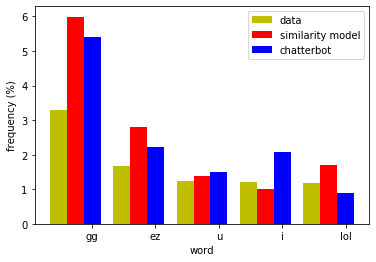

In [96]:
import matplotlib.pyplot as plt
 
name_list = word_sort
x =list(range(len(word_sort)))
total_width, n = 0.8, 3
width = total_width / n
 
plt.bar(x, frac0_sort, width=width, label='data',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, frac1_sort, width=width, label='similarity model',tick_label = name_list,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, frac2_sort, width=width, label='chatterbot',tick_label = name_list,fc = 'b')
plt.ylabel('frequency (%)')
plt.xlabel('word')
plt.legend()
plt.show()
plt.savefig('top5_frequency.png')